# Breast Cancer Diagnosis Prediction

## Overview
This notebook performs binary classification to predict breast cancer diagnosis (Benign vs Malignant) using machine learning techniques.

## Workflow
1. **Data Loading & Preprocessing**
   - Load dataset from CSV file
   - Clean column names
   - Handle missing values
   - Encode categorical variables

2. **Exploratory Data Analysis (EDA)**
   - Visualize class distribution
   - Analyze feature correlations with target variable
   - Select top 10 most correlated features

3. **Data Preparation**
   - Split data into training and testing sets (70/30 split)
   - Create preprocessing pipeline (imputation + standardization)
   - Transform features for modeling

4. **Model Training & Evaluation**
   - Train Logistic Regression classifier
   - Evaluate model performance using accuracy score
   - Generate detailed classification report

## Libraries Used
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical computations
- **matplotlib & seaborn**: Data visualization
- **scikit-learn**: Machine learning algorithms and preprocessing
- **joblib**: Model serialization

## Dataset
The dataset contains various features extracted from breast cancer cell images, with a binary diagnosis label (Benign/Malignant).

* `Import libraries`

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

* `Read Dataset`

In [ ]:
# Construct the file path to the dataset
# Goes up two directories from current working directory, then into 'dataset' folder
path = os.path.join(os.getcwd(), '..', '..', 'dataset', 'data.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Adjust col names
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [ ]:
# Display concise summary of the DataFrame
# Shows column names, non-null counts, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Remove unnecessary columns from the DataFrame
# 'id' column: likely not needed for analysis
# 'Unnamed:_32': typically an empty column created during CSV export
# axis=1 specifies columns (axis=0 would be rows)
# inplace=True modifies the original DataFrame without creating a copy
df.drop(columns=['id', 'Unnamed:_32'], axis=1, inplace=True)

In [ ]:
# Display DataFrame summary again after dropping columns
# Verify that 'id' and 'Unnamed:_32' columns have been successfully removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Check for missing values in the DataFrame
# Returns the count of null/NaN values for each column
# Useful for identifying data quality issues before analysis
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Count the frequency of each unique value in the 'diagnosis' column
# Useful for understanding the distribution of diagnostic categories
# Example: How many benign (B) vs malignant (M) cases in the dataset
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# Encode categorical 'diagnosis' column into numerical values
# LabelEncoder converts string labels (e.g., 'M', 'B') into integers (e.g., 0, 1)
# fit_transform() learns the encoding mapping and applies it to the data
# This is necessary for machine learning algorithms that require numerical input
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

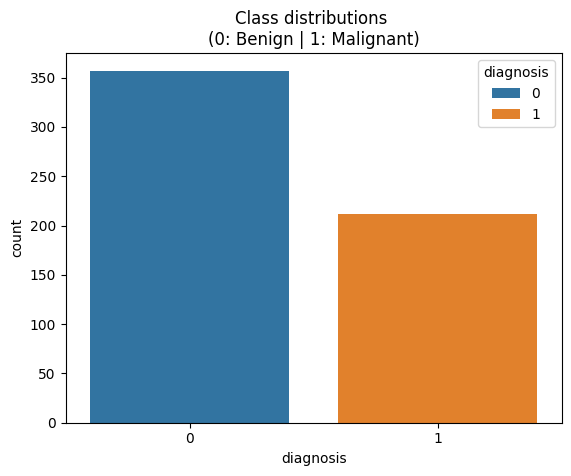

In [ ]:
# Visualize the distribution of diagnosis classes using a count plot
# x='diagnosis': categorical variable on x-axis
# hue='diagnosis': colors bars by diagnosis category for visual distinction
# Creates a bar chart showing the count of benign (0) vs malignant (1) cases
sns.countplot(x='diagnosis', data=df, hue='diagnosis')

# Add descriptive title explaining the encoded values
plt.title("Class distributions \n(0: Benign | 1: Malignant)")

# Display the plot
plt.show()

In [ ]:
# Calculate correlation between all features and the target variable 'diagnosis'
# corr() computes the correlation matrix for all numeric columns
# ['diagnosis'] extracts only correlations with the diagnosis column
# sort_values(ascending=False) orders from highest to lowest correlation
target_corr = df.corr()['diagnosis'].sort_values(ascending=False)

# Select the top 10 features most correlated with diagnosis
# [1:11] skips the first element (diagnosis itself, correlation = 1.0)
# and takes the next 10 features with highest correlation values
# .index.tolist() converts the index to a Python list
top_10_features = target_corr[1:11].index.tolist()

# Display the list of top 10 most correlated features
top_10_features

['concave_points_worst',
 'perimeter_worst',
 'concave_points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst']

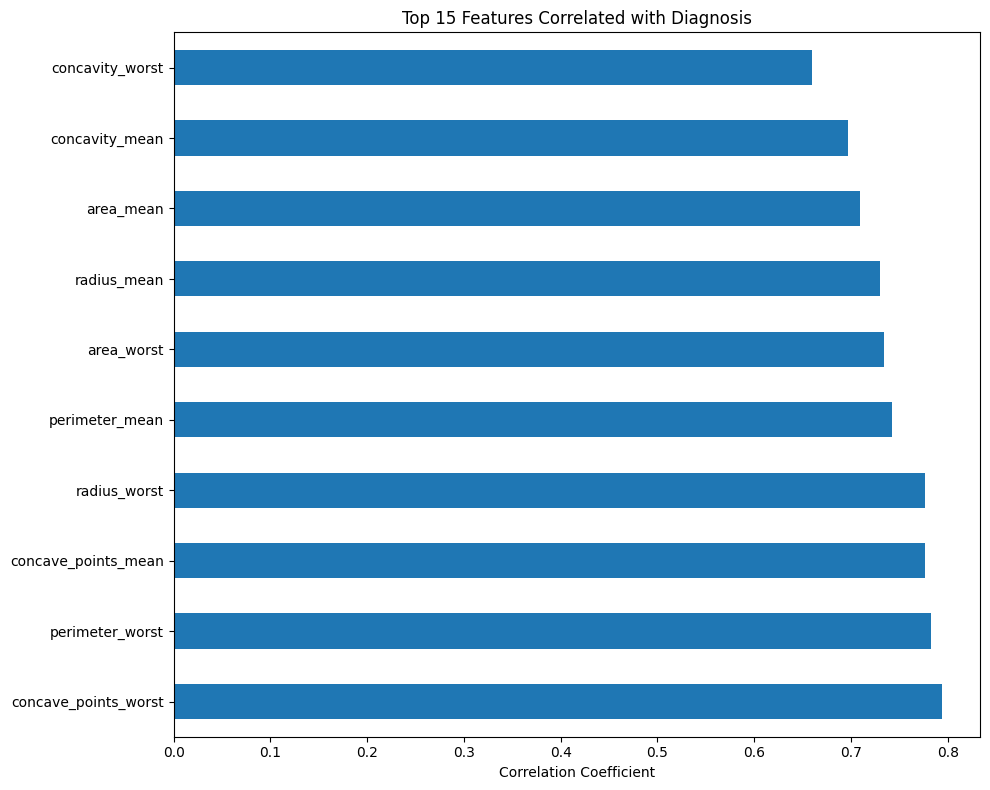

In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(10, 8))

# Plot top 10 features as a horizontal bar chart
# [1:11] excludes the target variable itself (index 0) and selects next 10 features
# kind='barh' creates horizontal bars for easier label reading
# Note: Comment says "top 15" but code shows top 10 features ([1:11])
target_corr[1:11].plot(kind='barh')

# Add title to describe the visualization
plt.title('Top 15 Features Correlated with Diagnosis')

# Label the x-axis to show what the bar lengths represent
plt.xlabel('Correlation Coefficient')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

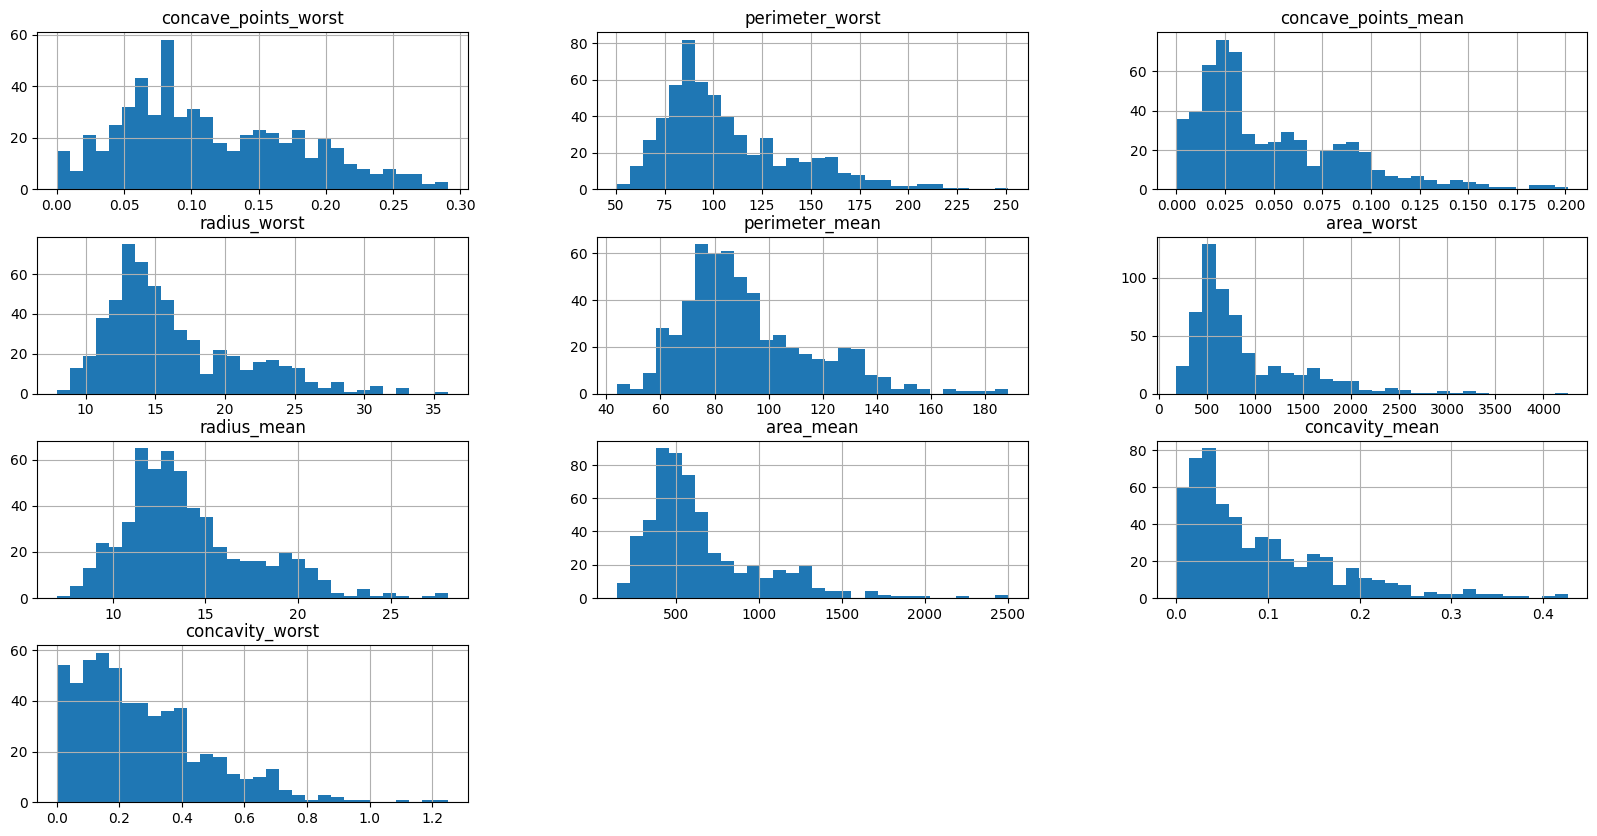

In [ ]:
# Create histograms for all top 10 features to visualize their distributions
# df[top_10_features] selects only the columns identified as most correlated
# bins=30: divides each feature's range into 30 intervals for granular distribution view
# figsize=(20, 10): creates a large figure to accommodate multiple subplots clearly
df[top_10_features].hist(bins=30, figsize=(20, 10))

# Display the histograms grid
plt.show()

* `Split to train & test`

In [ ]:
# Prepare features (X) and target variable (y) for machine learning
# X: Independent variables - contains only the top 10 most correlated features
# This reduces dimensionality and focuses on the most predictive features
X = df[top_10_features]

# y: Dependent variable - the diagnosis column (0: Benign, 1: Malignant)
# This is what the model will try to predict
y = df['diagnosis']

In [ ]:
# Split the dataset into training and testing sets
# X, y: features and target variable to be split
# test_size=0.3: allocate 30% of data for testing, 70% for training
# shuffle=True: randomly shuffle data before splitting to avoid ordering bias
# random_state=42: seed for reproducibility - ensures same split each time
# stratify=y: maintain the same class distribution (Benign/Malignant ratio) in both sets
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.3, shuffle=True, random_state=42,
       stratify=y 
   )

# Display the shape of training sets
# Shows number of samples and features in training data
print('x_train_shape \t', X_train.shape)
print('y_train_shape \t', y_train.shape)

# Visual separator for clarity
print('--'*10)

# Display the shape of testing sets
# Shows number of samples and features in testing data
print('x_test_shape \t', X_test.shape)
print('y_test_shape \t', y_test.shape)

x_train_shape 	 (398, 10)
y_train_shape 	 (398,)
--------------------
x_test_shape 	 (171, 10)
y_test_shape 	 (171,)


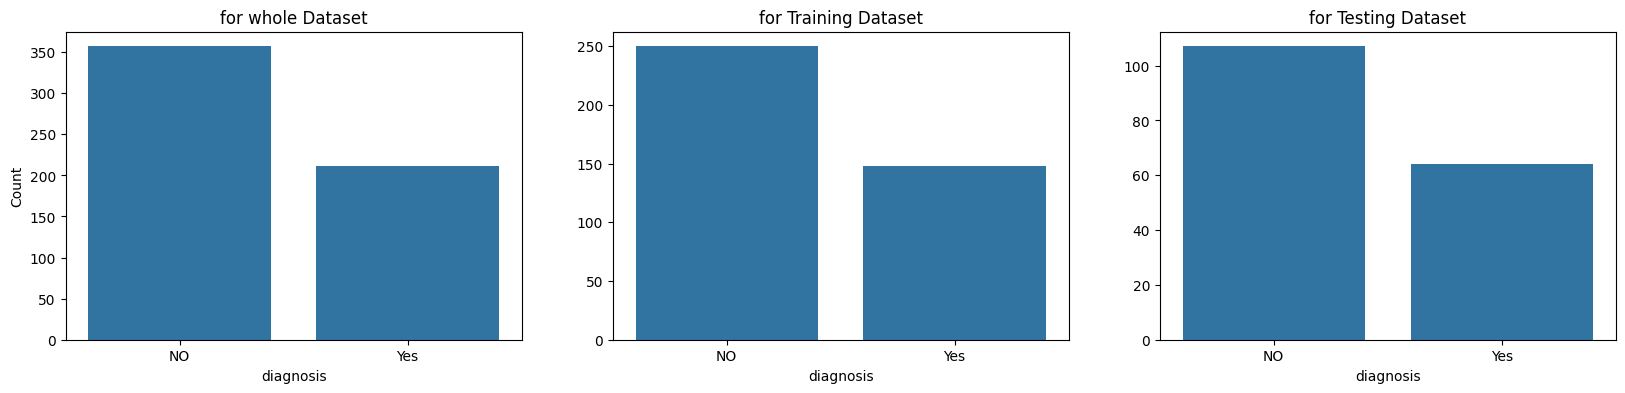

In [17]:
# plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('for whole Dataset')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['NO', 'Yes'])

# train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('for Training Dataset')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['NO', 'Yes'])

# test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('for Testing Dataset')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['NO', 'Yes'])

plt.show()

In [ ]:
# Create a preprocessing pipeline for numerical features
# Pipeline chains multiple transformation steps that execute in order
num_pipeline = Pipeline([
    # Step 1: Handle missing values by replacing them with the median
    ('imputer', SimpleImputer(strategy='median')),
    
    # Step 2: Standardize features by removing mean and scaling to unit variance
    # This ensures all features are on the same scale for better model performance
    ('scaler', StandardScaler())
])

# Create a ColumnTransformer to apply the pipeline to specific columns
# This allows different preprocessing for different column types if needed
preprocessor = ColumnTransformer(transformers=[
    # Apply the numerical pipeline to the top 10 selected features
    # Format: (name, transformer, columns)
    ('numerical', num_pipeline, top_10_features)
])

# Fit the preprocessor on training data and transform it
# fit_transform() learns the statistics (median, mean, std) from training data
# and applies the transformations
X_train_final = preprocessor.fit_transform(X_train)

# Transform test data using the statistics learned from training data
# transform() only applies transformations, doesn't learn new statistics
# This prevents data leakage from test set
x_test_final = preprocessor.transform(X_test)

In [19]:
X_train_final.shape, y_train.shape

((398, 10), (398,))

In [20]:
x_test_final.shape, y_test.shape

((171, 10), (171,))

In [ ]:
# Define the path to the models directory
# Navigates one level up from current directory, then into 'models' folder
MODELS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'models')

# Create the models directory if it doesn't already exist
# exist_ok=True prevents error if directory already exists
# This folder will store trained machine learning models
os.makedirs(MODELS_FOLDER_PATH, exist_ok=True)

In [ ]:
# Save the fitted preprocessor to disk for later use
# joblib.dump() serializes the preprocessor object (with learned statistics)
# This allows reusing the same preprocessing steps on new data without retraining
# Saved as 'preprocessor.pkl' in the models folder for deployment or future predictions
joblib.dump(preprocessor, os.path.join(MODELS_FOLDER_PATH, 'preprocessor.pkl'))

['c:\\Users\\Digital\\OneDrive\\Desktop\\ML\\Projects\\03- Machine Learning\\Classification\\Breast_Cancer_Wisconsin_Diagnosis\\src\\notebook\\..\\models\\preprocessor.pkl']

* `Building Models`
> Let's consider the evaluation metric to be accuracy_score

1. Using Logistic Regression

In [ ]:
# Initialize Logistic Regression classifier with custom parameters
# C=1.5: Inverse of regularization strength (higher = less regularization)
# max_iter=1000: Maximum number of iterations for optimization algorithm to converge
log_clf = LogisticRegression(C=1.5, max_iter=1000)

# Train the logistic regression model on the training data
# Learns the relationship between features (X_train) and target (y_train)
log_clf.fit(X_train, y_train)

# Make predictions on the training set
# Used to evaluate training performance and check for overfitting
y_pred_train_log = log_clf.predict(X_train)

# Make predictions on the test set
# Used to evaluate model performance on unseen data
y_pred_test_log = log_clf.predict(X_test)


In [24]:
score_train_log = accuracy_score(y_train, y_pred_train_log)
score_test_log = accuracy_score(y_test, y_pred_test_log)

print(f'The accuracy_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')
print(f'The accuracy_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

The accuracy_score using Logistic model for Training Dataset is 94.975
The accuracy_score using Logistic model for Testing Dataset is 95.322


In [ ]:
# Calculate accuracy score for training set predictions
# Compares actual labels (y_train) with predicted labels (y_pred_train_log)
# Returns the proportion of correct predictions
score_train_log = accuracy_score(y_train, y_pred_train_log)

# Calculate accuracy score for test set predictions
# Measures model performance on unseen data
score_test_log = accuracy_score(y_test, y_pred_test_log)

# Display training accuracy as a percentage with 3 decimal places
print(f'The accuracy_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')

# Display test accuracy as a percentage with 3 decimal places
# Comparing train vs test accuracy helps identify overfitting or underfitting
print(f'The accuracy_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
# Generate and display a detailed classification report for test set predictions
# Shows precision, recall, F1-score, and support for each class (Benign/Malignant)
# Provides a comprehensive evaluation beyond just accuracy
# Includes metrics for both classes and overall weighted/macro averages
print(classification_report(y_test, y_pred_test_log))

['c:\\Users\\Digital\\OneDrive\\Desktop\\ML\\Projects\\03- Machine Learning\\Classification\\Breast_Cancer_Wisconsin_Diagnosis\\src\\notebook\\..\\models\\log_clf.pkl']

### `Done by Eng / Mohamed Zahran`
`@8/112/2025`